Get all the fires from 2024 into a database

In [22]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
from rasterio.crs import CRS

In [4]:
df_wfigs_db = gpd.read_file('../external_validation_data/WFIGS_interagency_fire_db/68755f68-a2ce-461a-bfc1-ed61712f61e4.gdb/')
df_wfigs_db.head()

,poly_SourceOID,poly_IncidentName,poly_FeatureCategory,poly_MapMethod,poly_GISAcres,poly_CreateDate,poly_DateCurrent,poly_PolygonDateTime,poly_IRWINID,poly_FORID,...,attr_Source,attr_IsCpxChild,attr_CpxName,attr_CpxID,attr_SourceGlobalID,GlobalID,attr_IncidentComplexityLevel,SHAPE_Length,SHAPE_Area,geometry
0,NaN,PULLEN CREEK,Wildfire Daily Fire Perimeter,GPS-Walked,19.500000,2022-11-19 03:32:33+00:00,2022-12-16 18:10:29+00:00,2022-11-19T06:52:20+00:00,{EFB046E9-CE8C-4DE6-87A7-E824C33AE187},None,...,IRWIN,0.0,None,None,{5D73EEC4-8D85-4843-9D9C-141731517538},{E78D410B-99D1-495E-867E-70D9849988F5},None,0.017515,-0.000009,"MULTIPOLYGON (((-122.51244 46.34552, -122.5124..."
1,NaN,Bolt Creek,Wildfire Daily Fire Perimeter,Mixed Methods,14820.544258,2022-10-20 17:05:38+00:00,2022-10-20 18:07:32+00:00,2022-10-20T01:37:00+00:00,{67F475B6-B2B7-460A-B4DF-601B8E614F3A},None,...,IRWIN,0.0,None,None,{67F475B6-B2B7-460A-B4DF-601B8E614F3A},{2CAE4FC6-27E0-43AE-8F7F-D1BBDED23C32},None,1.601665,-0.007195,"MULTIPOLYGON (((-121.44149 47.77779, -121.4415..."
2,NaN,Cedar Creek,Wildfire Daily Fire Perimeter,IR Image Interpretation,127310.968593,2022-10-08 11:56:25+00:00,2022-10-28 20:19:36+00:00,2022-10-19T19:48:00+00:00,{21BB61C1-C479-4721-8295-9120974092D2},None,...,IRWIN,0.0,None,None,{21BB61C1-C479-4721-8295-9120974092D2},{F00C42C6-8F11-4FEE-9D50-F293D9F51EA0},None,4.850371,-0.057600,"MULTIPOLYGON (((-122.16645 43.67688, -122.1664..."
3,52195.0,Musket,Wildfire Daily Fire Perimeter,Hand Sketch,0.360000,2022-12-19 22:23:33+00:00,2022-12-20 00:19:52+00:00,2022-12-17T23:00:00+00:00,{BE9B2AF7-989E-4235-B29D-671465355AE7},None,...,IRWIN,0.0,None,None,{3DA6FD6E-78F0-4334-8F8A-4237117BD8E1},{1CA86506-881C-4CBF-A6E1-77AD6AD6C59B},None,0.006301,-0.000002,"MULTIPOLYGON (((-111.55901 33.65397, -111.5586..."
4,NaN,Saltillo,Wildfire Daily Fire Perimeter,Mixed Methods,120.897078,2022-08-03 15:16:00+00:00,2022-08-03 15:16:34+00:00,2022-08-03T03:12:20+00:00,{04D669DF-24C8-4C33-ABB2-0EDF9F989CF7},None,...,IRWIN,0.0,None,None,{375B387E-B68C-4941-AFBA-A808799D6EA4},{FB01DA94-C49E-42CE-923D-DDCF7D26B92F},None,0.038010,-0.000046,"MULTIPOLYGON (((-96.85159 30.52503, -96.85161 ..."


In [5]:
df_wfigs_db.columns.tolist()

['poly_SourceOID',
 'poly_IncidentName',
 'poly_FeatureCategory',
 'poly_MapMethod',
 'poly_GISAcres',
 'poly_CreateDate',
 'poly_DateCurrent',
 'poly_PolygonDateTime',
 'poly_IRWINID',
 'poly_FORID',
 'poly_Acres_AutoCalc',
 'poly_SourceGlobalID',
 'poly_Source',
 'attr_SourceOID',
 'attr_ABCDMisc',
 'attr_ADSPermissionState',
 'attr_CalculatedAcres',
 'attr_ContainmentDateTime',
 'attr_ControlDateTime',
 'attr_CreatedBySystem',
 'attr_IncidentSize',
 'attr_DiscoveryAcres',
 'attr_DispatchCenterID',
 'attr_EstimatedCostToDate',
 'attr_FinalAcres',
 'attr_FFReportApprovedByTitle',
 'attr_FFReportApprovedByUnit',
 'attr_FFReportApprovedDate',
 'attr_FireBehaviorGeneral',
 'attr_FireBehaviorGeneral1',
 'attr_FireBehaviorGeneral2',
 'attr_FireBehaviorGeneral3',
 'attr_FireCause',
 'attr_FireCauseGeneral',
 'attr_FireCauseSpecific',
 'attr_FireCode',
 'attr_FireDepartmentID',
 'attr_FireDiscoveryDateTime',
 'attr_FireMgmtComplexity',
 'attr_FireOutDateTime',
 'attr_FireStrategyConfinePerce

In [6]:
df_wfigs_db['create_time'] = [pd.Timestamp(dt) for dt in df_wfigs_db['poly_CreateDate'] ]


<Axes: >

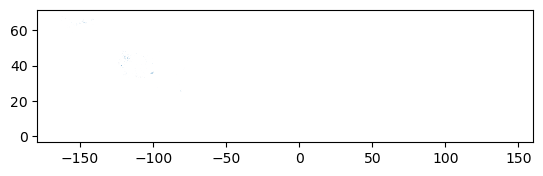

In [7]:
df_fire_wfigs_2024 = df_wfigs_db[df_wfigs_db.create_time > pd.Timestamp('2024-01-01', tz='utc')].reset_index(drop=True)
df_fire_wfigs_2024.rename(columns={'poly_IncidentName': 'name'}, inplace=True)
df_fire_wfigs_2024 = df_fire_wfigs_2024[['name', 'create_time', 'attr_ContainmentDateTime', 'geometry']].copy()
df_fire_wfigs_2024.plot()

In [8]:
df_fire_wfigs_2024.head()

,name,create_time,attr_ContainmentDateTime,geometry
0,BOBCAT,2024-02-02 18:48:04+00:00,2022-09-25 04:30:00+00:00,"MULTIPOLYGON (((-104.30486 43.50095, -104.3047..."
1,251016,2024-01-03 20:02:06+00:00,NaT,"MULTIPOLYGON (((-92.03142 46.84349, -92.03143 ..."
2,Reservoir,2024-04-29 21:00:47+00:00,NaT,"MULTIPOLYGON (((-71.05144 42.22635, -71.05152 ..."
3,Sand Piper,2024-06-11 20:29:09+00:00,2022-05-17 23:45:00+00:00,"MULTIPOLYGON (((-121.84744 42.54925, -121.8474..."
4,SCOTTY DRAW,2024-02-02 19:02:33+00:00,2022-07-17 03:10:00+00:00,"MULTIPOLYGON (((-105.88409 44.41201, -105.8840..."


In [10]:
df_fire_wfigs_2024[['name','geometry']].to_file('db_2024')

# Specific Fires

In [13]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [65]:
fire_names = ['Durkee', 'PARK', 'Paddock', 'Monkey Creek', 'Smokehouse Creek']


for name in fire_names:
    event_name = f'{name.lower().replace(" ", "_")}_fire_2024'
    source_id = f'WFIGS {name}'
    df_fire_t = df_fire_wfigs_2024[df_fire_wfigs_2024.name == name].reset_index(drop=True)[['create_time','geometry']]
    if event_name == 'park_fire_2024':
        df_fire_t = df_fire_t.cx[:-120, :].copy()
    geo = df_fire_t.geometry.unary_union
    df_event_f = gpd.GeoDataFrame({'name': [event_name],
                                   'date': [pd.to_datetime(df_fire_t.create_time.dt.date.iloc[0])],
                                   'source_id': [source_id]},
                                    geometry=[geo],
                               crs=CRS.from_epsg(4326))
   
    df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_name}.geojson', driver='GeoJSON')